In [1]:
import math
import scipy
from scipy import interpolate
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from scipy.integrate import odeint
import scipy.optimize as optimize
matplotlib.style.use('publication')

D:\Program Files\Anaconda\lib\site-packages\matplotlib\style\core.py:203: UserWarning: In C:\Users\Asus\.matplotlib\stylelib\publication.mplstyle: Duplicate key in file "C:\Users\Asus\.matplotlib\stylelib\publication.mplstyle", line #10
  warnings.warn(message)


# np.loadtxt

In [2]:
EPN = np.transpose(np.loadtxt("MKVOR.dat",delimiter=' '))

In [3]:
Pn=interpolate.interp1d(EPN[2],EPN[1])
Np=interpolate.interp1d(EPN[1],EPN[2])
En=interpolate.interp1d(EPN[2],EPN[0])
Ne=interpolate.interp1d(EPN[0],EPN[2])
Pe=interpolate.interp1d(EPN[0],EPN[1])
Ep=interpolate.interp1d(EPN[1],EPN[0])


Text(0,0.5,'P')

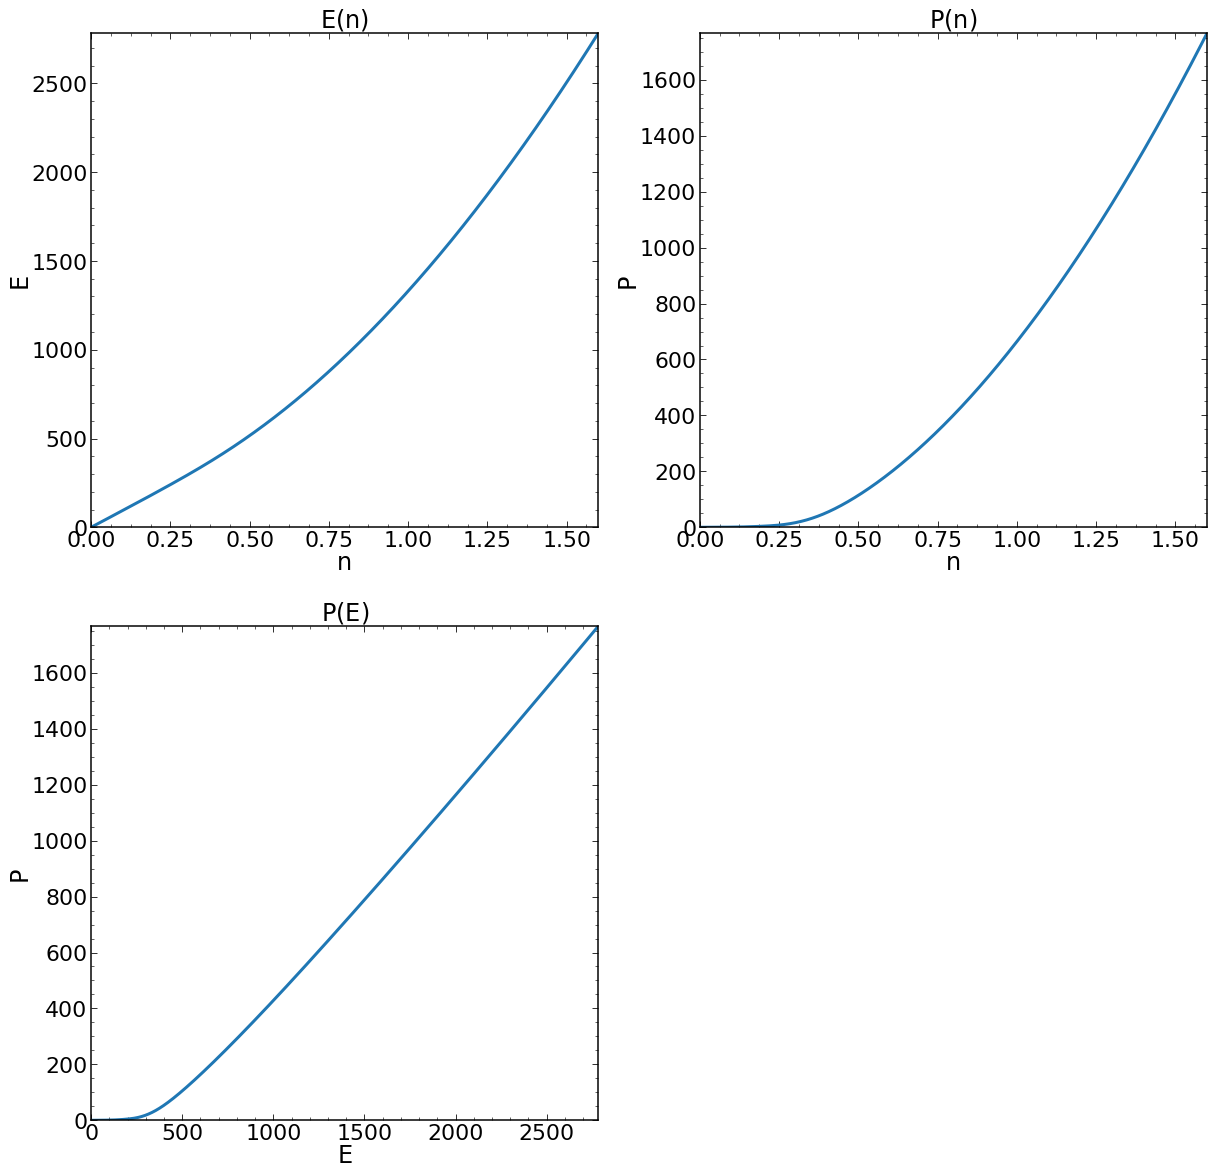

In [4]:
nx=np.linspace(0, EPN[2][len(EPN[2])-1], 10**5)
Ex=np.linspace(0, EPN[0][len(EPN[0])-1], 10**5)
plt.figure(figsize=(20,20))
plt.subplot (2, 2, 1)
plt.plot(nx,En(nx))
plt.title ('$E(n)$')
plt.xlabel('n')
plt.ylabel('E')

plt.subplot (2, 2, 2)
plt.plot (nx,Pn(nx))
plt.title ('$P(n)$')
plt.xlabel('n')
plt.ylabel('P')
plt.subplot (2, 2, 3)

plt.plot (Ex,Pe(Ex))
plt.title ('$P(E)$')
plt.xlabel('E')
plt.ylabel('P')


$\cfrac{dM}{dr}=4\pi r^2E$

$M/M_0=[m], r/km=[r],P=\cfrac{MeV}{fm^3}[P],E=\cfrac{MeV}{fm^3}[E],N=n_0[n]$

$\cfrac{d[m]}{d[r]}=4\pi \bigg(\cfrac{km^3}{M_0}\cfrac{MeV}{fm^3}\bigg)[r]^2[E]=4\pi\ const\ [r]^2[E]$

$\cfrac{dP}{dr}=\cfrac{(E(r)+P(r))(M(r)+4\pi r^3P(r))}{r(r-2M(r))}$

$\cfrac{d[P]}{d[r]}=-\cfrac{M_0}{km}\cfrac{([E]+[P])\big([m]+4\pi\bigg(\frac{MeV\ km^3}{M_0\ fm^3}\bigg)[r]^3[P]\big)}{[r]\big([r]-\frac{M_0}{km}[m]\big)}=-M_0\cfrac{([E]+[P])\big([m]+4\pi\ const[r]^3[P]\big)}{[r]\big([r]-M_0[m]\big)}$

$MeV=\frac{1.673}{938.272}\cdot10^{-27}kg=\frac{1.673}{938.272}\cdot10^{-27}\frac{6.67*10^{-14}}{9*10^{16}}km=\frac{1.673\cdot6.67}{938.272\cdot9}10^{-57}\ km$

$fm=10^{-18}\ km$

$M_0=1.4766\ km$

In [5]:
n0=0.16
MSun=1.4766
mev=1.673/938.272/9*6.67*10**-57
fm=10**-18
const=mev/MSun/fm**3

In [6]:
const

8.949270703110808e-07

In [7]:
def dM(p,r):
    if p>0:
        return 4*math.pi*const*(r**2*Ep(p))
    else:
        return 0

In [35]:
def M0(n,r0):
    return 4*math.pi/3*const*r0**3*En(n)

In [9]:
def dP(p,m,r):
    if p>0:
        return -MSun*(Ep(p)+p)*(m+4*math.pi*const*r**3*p)/r/(r-2*MSun*m)
    else:
        return 0

In [10]:
def dWhole(y,r):
    m,p=y
    return [dM(p,r),dP(p,m,r)]

## scipy.integrate.odeint 

In [43]:
r0=10**-3
r=np.linspace(r0,20,10**6)
N=10**3
Rstar=[]
Mstar=[]
for n in range(N):
    ntmp=EPN[2][len(EPN[2])-1]
    nc=ntmp-(ntmp-0.1)*n/N
    result = np.transpose(odeint(dWhole,[M0(nc,r0),Pn(nc)],r))
    for i in range(len(result[1])-1):
        if result[1][i]<=0:
            break
    Rx=r[i-1]
    Rstar.append(Rx)
    Mstar.append(result[0][i-1])

2.340089937997653


(10, 14)

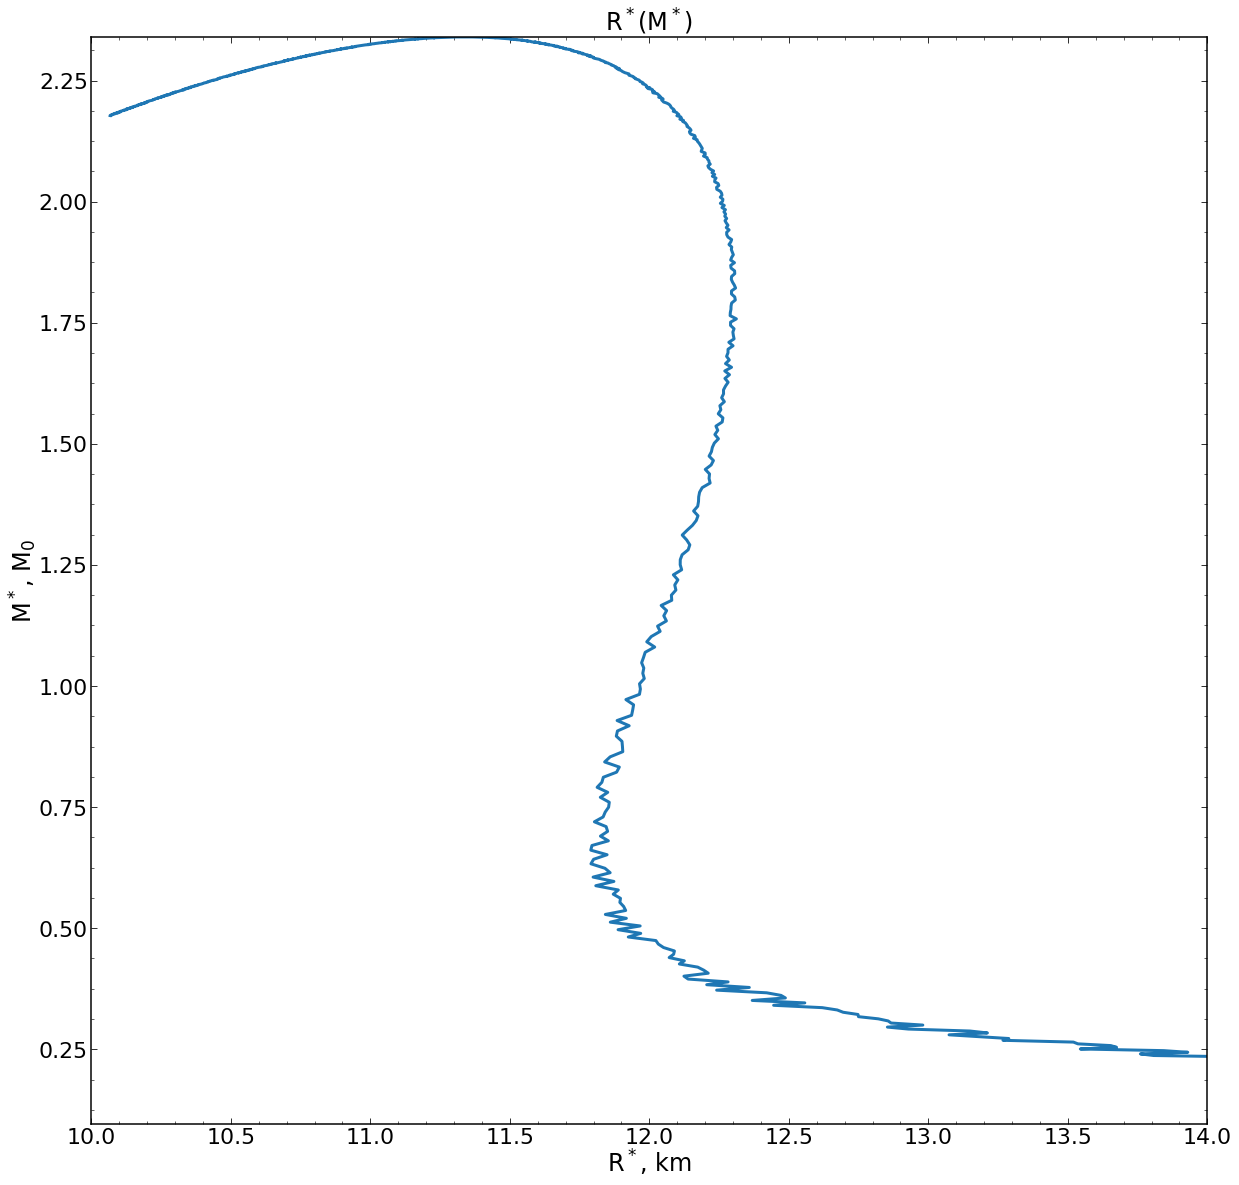

In [42]:
print(max(Mstar))
plt.figure(figsize=(20,20))
plt.plot(Rstar,Mstar)
plt.title ('$R^*(M^*)$')
plt.xlabel('$R^*$, km')
plt.ylabel('$M^*$, $M_0$')
plt.xlim((10,14))

In [13]:
max(Mstar)

2.340085715771594